# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

This will take several minutes ...
Started processing readonly/small_img.zip image archive.
Running OCR on file: a-0.png
Running FCC on file: a-0.png
Running OCR on file: a-1.png
Running FCC on file: a-1.png
Running OCR on file: a-2.png
Running FCC on file: a-2.png
Running OCR on file: a-3.png
Running FCC on file: a-3.png
Finished processing readonly/small_img.zip image archive.

Searching for ['Christopher'] in readonly/small_img.zip

Results found in file a-0.png


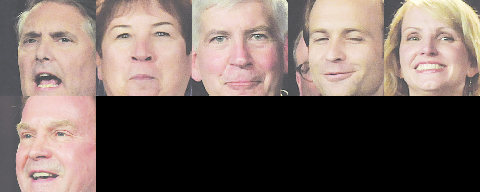


Results found in file a-3.png


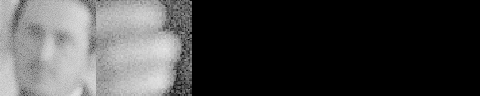

Started processing readonly/images.zip image archive.
Running OCR on file: a-0.png
Running FCC on file: a-0.png
Running OCR on file: a-1.png
Running FCC on file: a-1.png
Running OCR on file: a-10.png
Running FCC on file: a-10.png
Running OCR on file: a-11.png
Running FCC on file: a-11.png
Running OCR on file: a-12.png
Running FCC on file: a-12.png
Running OCR on file: a-13.png
Running FCC on file: a-13.png
Running OCR on file: a-2.png
Running FCC on file: a-2.png
Running OCR on file: a-3.png
Running FCC on file: a-3.png
Running OCR on file: a-4.png
Running FCC on file: a-4.png
Running OCR on file: a-5.png
Running FCC on file: a-5.png
Running OCR on file: a-6.png
Running FCC on file: a-6.png
Running OCR on file: a-7.png
Running FCC on file: a-7.png
Running OCR on file: a-8.png
Running FCC on file: a-8.png
Running OCR on file: a-9.png
Running FCC on file: a-9.png
Finished processing readonly/images.zip image archive.

Searching for ['Mark'] in readonly/images.zip

Results found in file a

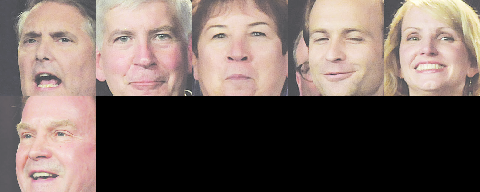


Results found in file a-1.png


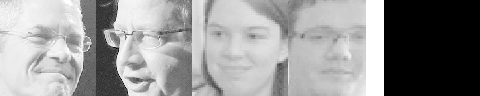


Results found in file a-10.png
But sorry, there were no faces in that file!

Results found in file a-13.png


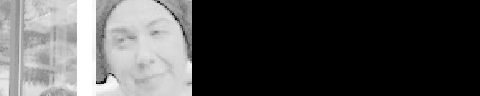


Results found in file a-2.png


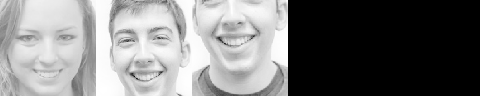


Results found in file a-3.png


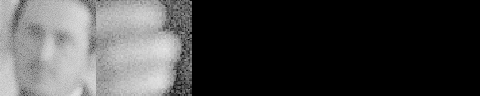


Results found in file a-8.png
But sorry, there were no faces in that file!


In [17]:
#
# Course Project - Python Project: pillow, tesseract, and opencv
# Bob Kozdemba, 12/12/2019
#
# Use pillow, tesseract, and opencv to perform optical character
# and facial recognition from a collection of scanned newspaper pages.
#

import zipfile
import pytesseract
import PIL
from PIL import Image
from PIL import ImageFile
import pytesseract
import cv2 as cv
import numpy as np
import math

# Load the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

#
# Global data structure for storing results.
#
# Example:
# globalData = [{'filename': string, pilImage': object, 'text' : string, 'faces': [] }]
#
globalData = []

def getSmallestFace(imageDict):
    """ Return the dimensions of the face (a tuple) with the smallest width"""
    sortedList = sorted(imageDict['faces'], key = lambda x: x[2])
    smallestDim = (sortedList[0][2], sortedList[0][3])
    return (sortedList[0][2], sortedList[0][3])
            
def getFacesFromImage(pil_image):
    open_cv_image = np.array(pil_image) 
    # Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy()
    gray = cv.cvtColor(open_cv_image, cv.COLOR_BGR2GRAY)
    # This function returns a list of objects as rectangles. 
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.35, minNeighbors=4)
    return faces

def getImageFromZip(zfile, filename):
        """ 
        Extract a PIL compatible image from a zip archive.
        
        :param zfile: The path to a zip archive (string).
        :param filename: Image filename within the zip archive (string).
        :returns: A `~PIL.Image.Image` object.
        """
        myzip = zipfile.ZipFile(zfile, 'r')
        fp = myzip.read(filename)
        p = ImageFile.Parser()
        p.feed(fp)
        img = p.close()
        return img

def getTextFromImage(image):
    """
    Return a string of text from an image.
    
    :param image: PIL compatible image
    :return text(string)
    """
    
    image = image.convert('L')
    image = image.convert('1')
    text = pytesseract.image_to_string(image)
    return text

def displayFaces(i):
        """Display the faces in this image."""
        cellDims = getSmallestFace(i)
        cellDims = (192, 192)
        totalCells = len(i['faces']) 
        cellsPerRow = 5
        sheetDims = (cellsPerRow * cellDims[0], math.ceil(totalCells / cellsPerRow) * cellDims[1])
        
        contact_sheet=PIL.Image.new(i['pilImage'].mode, sheetDims)

        x = 0
        y = 0
        
        for rec in i['faces']:
            c = (rec[0], rec[1], rec[0] + rec[2], rec[1] + rec[3])
            faceImage = i['pilImage'].crop(c)
            r = faceImage.resize(cellDims)
            contact_sheet.paste(r, (x, y) )
            
            if x + cellDims[0] == contact_sheet.width:
                x = 0
                y = y + cellDims[1]
            else:
                x = x + cellDims[0]

        # Resize and display the contact sheet
        contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
        display(contact_sheet)

def processImageSet(zipArchive, globalDataStructure):
    """
       This function searches each image in the zipfile
       for text and faces. The results are stored as dictionaries in the 
       globalData list defined above.
    """
    #for file in ['a-0.png']:  # For testing a single image.
    for file in zipfile.ZipFile(zipArchive, 'r').namelist():
        d = {}
        d['filename'] = file
        d['pilImage'] = getImageFromZip(zipArchive, file)
        print('Running OCR on file:', file)
        d['text'] = getTextFromImage(d['pilImage']) 
        print('Running FCC on file:', file)
        d['faces'] = getFacesFromImage(d['pilImage'])
        globalDataStructure.append(d)

#
# Search the globalData structure for text and face rectangles.
#
def searchAndDisplay(searchTerms, globalDataStructure):
    for i in globalDataStructure:
        for search in searchTerms:
            if search in i['text']:
                print('\nResults found in file {}'.format(i['filename']))

                if len(i['faces']) > 0:
                    displayFaces(i)
                else:
                    print('But sorry, there were no faces in that file!')


#
# Begin main 
#
print('This will take several minutes ...')
zipArchive = 'readonly/small_img.zip'
searchTerms = ['Christopher']
print('Started processing {} image archive.'.format(zipArchive))
processImageSet(zipArchive, globalData)
print('Finished processing {} image archive.'.format(zipArchive))
print('\nSearching for {} in {}'.format(searchTerms, zipArchive))
searchAndDisplay(searchTerms, globalData)

zipArchive = 'readonly/images.zip'
searchTerms = ['Mark']
del globalData
globalData = []
print('Started processing {} image archive.'.format(zipArchive))
processImageSet(zipArchive, globalData)
print('Finished processing {} image archive.'.format(zipArchive))
print('\nSearching for {} in {}'.format(searchTerms, zipArchive))
searchAndDisplay(searchTerms, globalData)




    
    